# Part 1: Reading and Cleaning the Data

In [16]:
from sqlalchemy import create_engine, text
import numpy as np
import pandas as pd
import datetime as dt

# Set up database path
database_path = "sqlite:///C:/Users/sooki/OneDrive/Desktop/Project_3/Flights_Data_Out.sqlite"

# Create Engine
engine = create_engine(database_path)

# Query All Records in the Database
query_all = text("SELECT * FROM Flights_Data_Out;")
data_all = engine.execute(query_all)

In [17]:
# Display the first 5 rows of the data
query_all = "SELECT * FROM Flights_Data_Out;"
Flights_Out = pd.read_sql_query(query_all, engine)
Flights_Out.head()

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,107767,Mar-22,O,Adelaide,Doha,Qatar Airways,ADL-DOH,Qatar,Middle East,Qatar,Middle East,0,12,3396,2022,3
1,107768,Mar-22,O,Adelaide,Kuala Lumpur,Malaysia Airlines,ADL-KUL,Malaysia,SE Asia,Malaysia,SE Asia,0,2,580,2022,3
2,107769,Mar-22,O,Adelaide,New Delhi,Qantas Airways,MEL-ADL-DEL,India,S Asia,India,S Asia,0,18,4512,2022,3
3,107770,Mar-22,O,Adelaide,New Delhi,Qantas Airways,SYD-ADL-DEL,India,S Asia,India,S Asia,0,15,3757,2022,3
4,107771,Mar-22,O,Adelaide,Singapore,Singapore Airlines,ADL-SIN,Singapore,SE Asia,Singapore,SE Asia,0,20,6060,2022,3


In [18]:
# Find out the data types of each columns of this dataset
data_types = Flights_Out.dtypes

print("Data Types of Each Column:")
data_types

Data Types of Each Column:


_id                   object
Month                 object
In_Out                object
Australian_City       object
International_City    object
Airline               object
Route                 object
Port_Country          object
Port_Region           object
Service_Country       object
Service_Region        object
Stops                 object
All_Flights           object
Max_Seats             object
Year                  object
Month_num             object
dtype: object

In [19]:
# List of columns containing numeric data
numeric_columns = ['_id', 'Stops', 'All_Flights', 'Max_Seats', 'Year', 'Month_num']

# Convert selected columns to numeric types for analysis and filtering purposes
Flights_Out[numeric_columns] = Flights_Out[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
updated_data_types = Flights_Out.dtypes

print("Updated Data Types of Each Column:")
updated_data_types


Updated Data Types of Each Column:


_id                    int64
Month                 object
In_Out                object
Australian_City       object
International_City    object
Airline               object
Route                 object
Port_Country          object
Port_Region           object
Service_Country       object
Service_Region        object
Stops                  int64
All_Flights            int64
Max_Seats              int64
Year                   int64
Month_num              int64
dtype: object

# Part 2: Visualisations

In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1) Top Airlines Departing from Australia - Patricia
- matplotlib

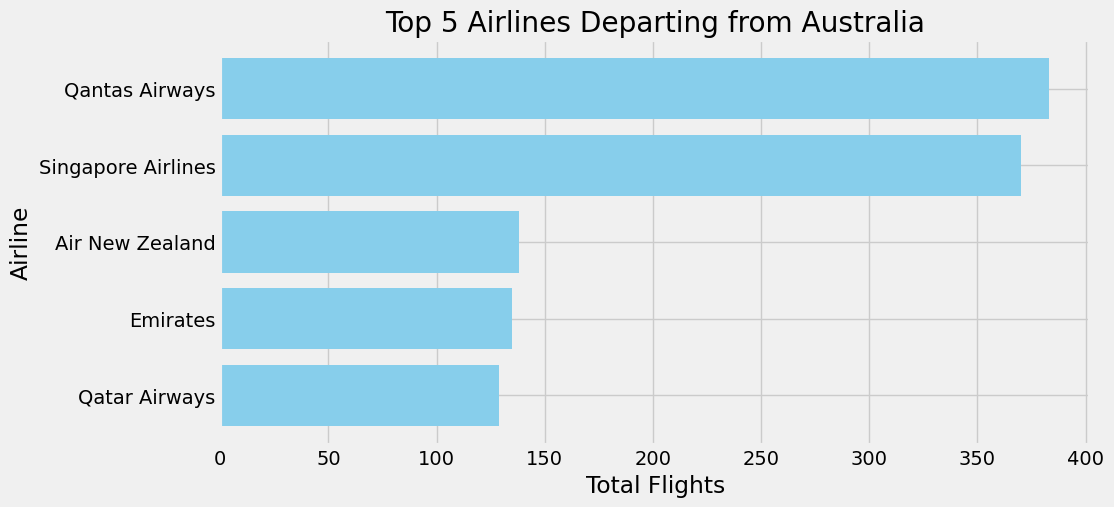

In [21]:
# Group by 'Airline', calculate the sum of 'All Flights'
# Sort in descending order based on tatol flights and find out the top 5 airlines
top_airlines_total_flights = Flights_Out.groupby('Airline')['All_Flights'].sum().reset_index()
top_airlines_total_flights = top_airlines_total_flights.sort_values(by='All_Flights', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_airlines_total_flights['Airline'], top_airlines_total_flights['All_Flights'], color='skyblue')
plt.gca().invert_yaxis()  
    
plt.title('Top 5 Airlines Departing from Australia')
plt.xlabel('Total Flights')
plt.ylabel('Airline')

plt.show()

## 2) Popular Destinations by Total Flights - Shenae
- plotly.express

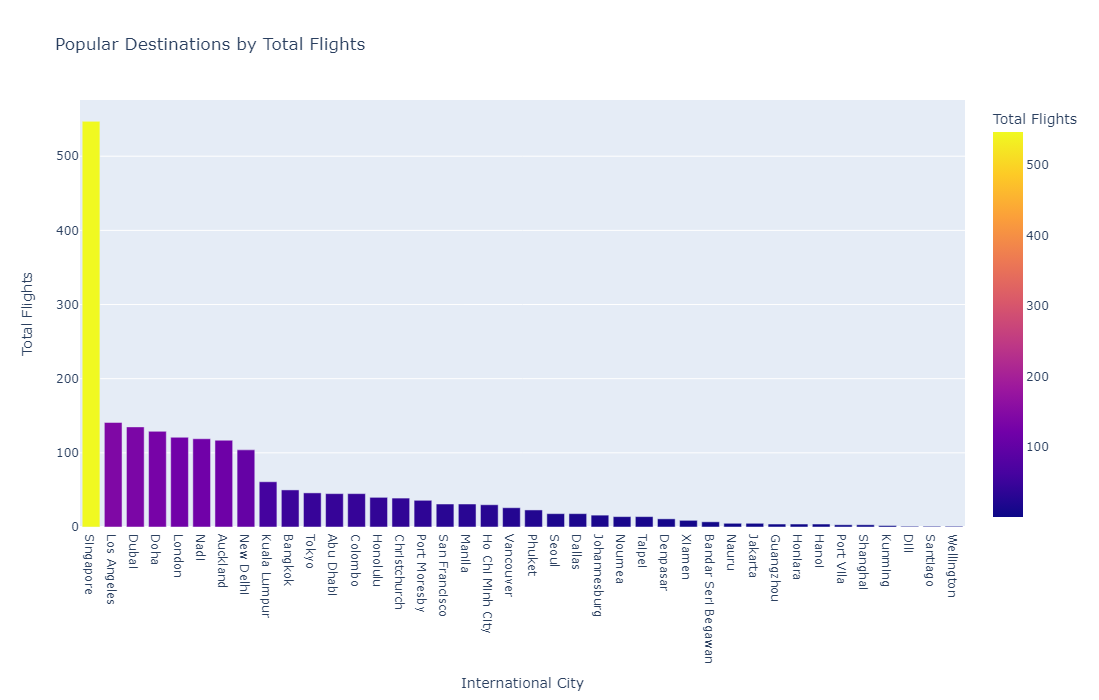

In [22]:
# Group by International City and calculate total flights to each destination
popular_destinations = Flights_Out.groupby('International_City')['All_Flights'].sum().reset_index()

# Sort by total flights in descending order to find popular destinations
popular_destinations = popular_destinations.sort_values(by='All_Flights', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(popular_destinations, x='International_City', y='All_Flights',
             title='Popular Destinations by Total Flights',
             labels={'All_Flights': 'Total Flights', 'International_City': 'International City'},
             color='All_Flights')

fig.update_layout(height=700)

fig.show()

##  3) Total Flights per Route per Airline - Partricia
- plotly.express

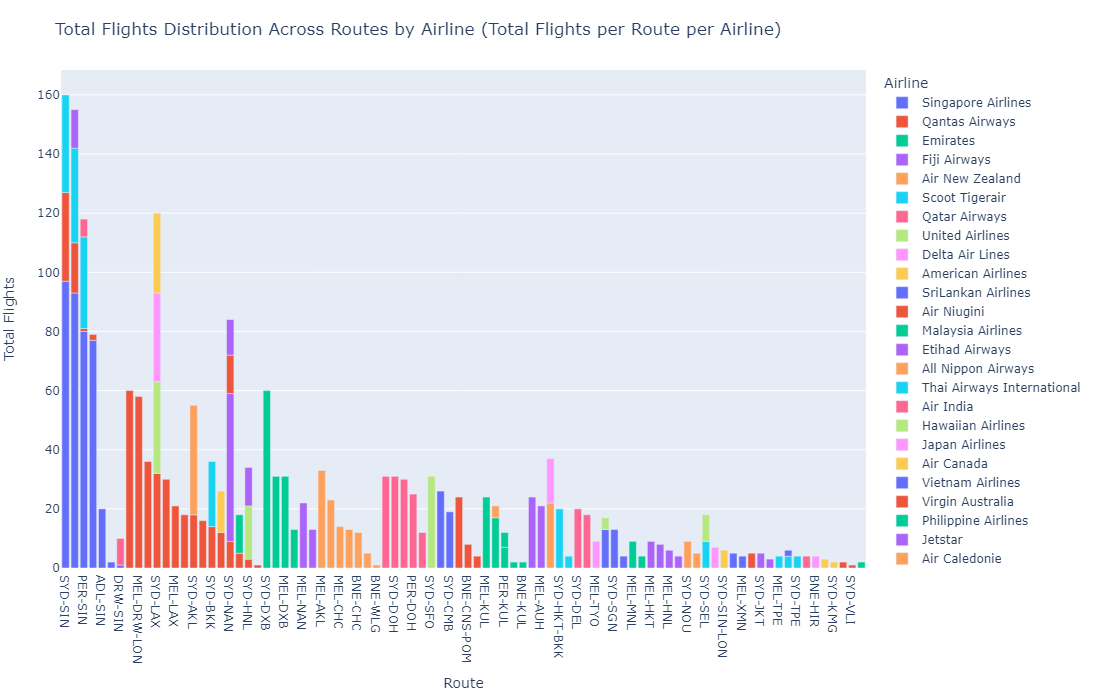

In [23]:
# Group by Route, Airline and calculate total flights
top_routes = Flights_Out.groupby(['Airline', 'Route'])['All_Flights'].sum().reset_index()
top_routes = top_routes.sort_values(by='All_Flights', ascending=False)

# Plots
fig = px.bar(top_routes, x='Route', y='All_Flights', color='Airline', 
             title='Total Flights Distribution Across Routes by Airline (Total Flights per Route per Airline)',
             labels={'All_Flights': 'Total Flights', 'Route': 'Route'},
             hover_data={'Route': False, 'Airline': True, 'All_Flights': True})

fig.update_layout(xaxis_title='Route', yaxis_title='Total Flights')
fig.update_layout(height=700, margin=dict(l=30, r=30, t=70, b=20))

fig.show()

## 4) Airline Routes Distribution - Shenae
- plotly.express

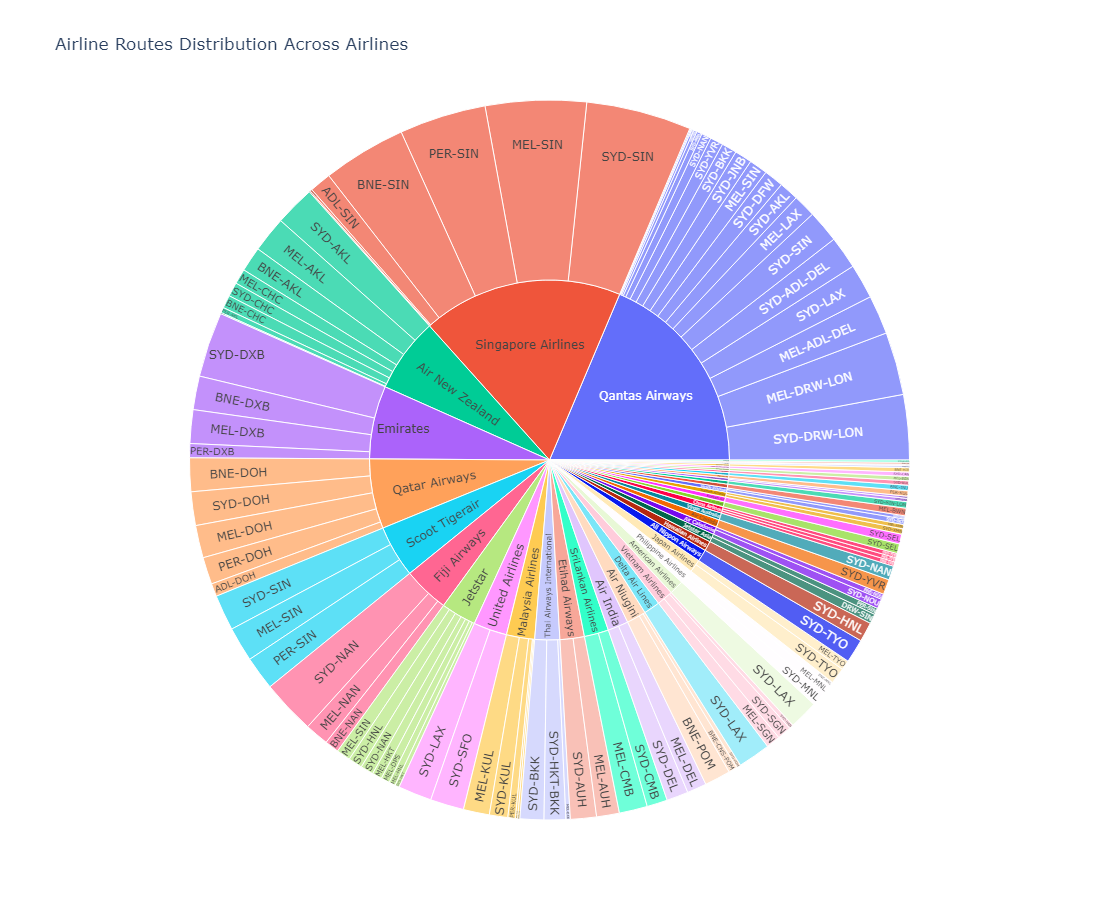

In [24]:
# Group by Airline and Route and calculate total flights
airline_route_data = Flights_Out.groupby(['Airline', 'Route'])['All_Flights'].sum().reset_index()

# Plot an interactive sunburst chart
fig = px.sunburst(airline_route_data, path=['Airline', 'Route'], values='All_Flights',
                  title='Airline Routes Distribution Across Airlines', labels={'All_Flights': 'Total Flights'})

fig.update_layout(width=900, height=900)

fig.show()

## 5) Average Maximum Seats in Flights Across Australian Cities - Shenae
- seaborn and matplotlib.pyplot

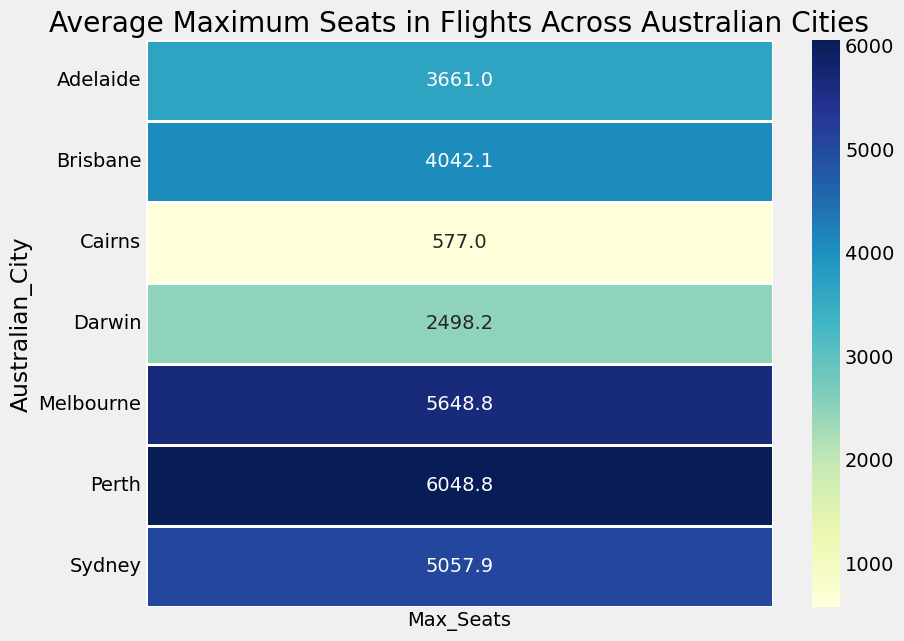

In [25]:
# Pivot the data for creating a heatmap
# Calculate the mean of 'Max_Seats' for each city in 'Australian_City' column
heatmap_data = Flights_Out.pivot_table(values='Max_Seats', index='Australian_City', aggfunc='mean')

# Plot a heatmap using Seaborn
plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.9)
plt.title('Average Maximum Seats in Flights Across Australian Cities')

plt.show()

## 6) Heatmap of busiest airports - Sookie

In [26]:
# All flights and group by airport
busiest_airports = Flights_Out.groupby('Australian_City')['All_Flights'].sum().reset_index()

# Sort by total flights and display the result
busiest_airports_sorted = busiest_airports.sort_values(by='All_Flights', ascending=False)
busiest_airports_sorted

,Australian_City,All_Flights
6,Sydney,975
4,Melbourne,519
1,Brisbane,246
5,Perth,173
3,Darwin,70
0,Adelaide,67
2,Cairns,6


In [27]:
from geopy.geocoders import Nominatim

# Create a list of city names
airports = [
    'Adelaide',
    'Brisbane',
    'Cairns',
    'Darwin',
    'Melbourne',
    'Perth',
    'Sydney']

# Initialize a geolocator
geolocator = Nominatim(user_agent='city_coordinates')

# Function to get latitude and longitude for a city
def get_lat_lon(city):
    location = geolocator.geocode(city)
    return (location.latitude, location.longitude) if location else (None, None)

# Create a DataFrame to store the city coordinates
airport_cities = pd.DataFrame({'City': airports})
airport_cities['Latitude'], airport_cities['Longitude'] = zip(*airport_cities['City'].apply(get_lat_lon))

airport_cities

,City,Latitude,Longitude
0,Adelaide,-34.928181,138.599931
1,Brisbane,-27.468968,153.023499
2,Cairns,-16.920666,145.772185
3,Darwin,-12.460440,130.841047
4,Melbourne,-37.814245,144.963173
5,Perth,-31.955893,115.860585
6,Sydney,-33.869844,151.208285


In [28]:
# Merge the two DataFrames based on the 'City' column
merged_airports_data = pd.merge(airport_cities, busiest_airports, left_on='City', right_on='Australian_City', how='left')

# Rearrange columns and drop the duplicate 'Australian_City' column
merged_airports_data = merged_airports_data[['City', 'Latitude', 'Longitude', 'All_Flights']]

merged_airports_data


,City,Latitude,Longitude,All_Flights
0,Adelaide,-34.928181,138.599931,67
1,Brisbane,-27.468968,153.023499,246
2,Cairns,-16.920666,145.772185,6
3,Darwin,-12.460440,130.841047,70
4,Melbourne,-37.814245,144.963173,519
5,Perth,-31.955893,115.860585,173
6,Sydney,-33.869844,151.208285,975


In [29]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered around a location that is centered around Australia
map_center = [-25.2744, 133.7751]  
airport_heatmap = folium.Map(location=map_center, zoom_start=4)

# Add a heatmap layer based on the 'All_Flights' amount
heat_data = merged_airports_data[['Latitude', 'Longitude', 'All_Flights']].values.tolist()
HeatMap(heat_data, radius=25).add_to(airport_heatmap)

# Add markers for each airport city
for index, row in merged_airports_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"{row['City']}: {row['All_Flights']} flights").add_to(airport_heatmap)

airport_heatmap


## 7) Top Routes filtered by Airways -Sookie
- Plotly Express library used to produce the bar chart
- IPython.display used to display rich content
- ipywidgets library used to produce the interactive dropdown menu

In [30]:
import plotly.express as px
from IPython.display import display
import ipywidgets as widgets

# Get unique airlines for dropdown
airlines_list = Flights_Out['Airline'].unique()

# Dropdown for selecting airline
dropdown_airline = widgets.Dropdown(options=airlines_list, value=airlines_list[0], description='Airline:')

# Function to update the visual based on the selected airline
def update_chart(selected_airline):
    # Filter the DataFrame for the selected airline
    airline_data = Flights_Out[Flights_Out['Airline'] == selected_airline]

    # Group by Route and calculate total flights
    top_routes_airline = airline_data.groupby('Route')['All_Flights'].sum().reset_index()

    # Sort by total flights and get the top routes
    top_routes_airline = top_routes_airline.sort_values(by='All_Flights', ascending=False).head(5)

    # Create a bar chart using Plotly Express
    fig = px.bar(top_routes_airline, x='Route', y='All_Flights',
                 title=f'Top Routes for {selected_airline}',
                 labels={'All_Flights': 'Total Flights', 'Route': 'Route'},
                 color='All_Flights',
                 color_continuous_scale='sunset',
                 hover_name='Route')

    # Customize the layout
    fig.update_layout(xaxis_title='Route', yaxis_title='Total Flights',
                      xaxis=dict(tickangle=45),
                      showlegend=True,
                      height=600)

    fig.show()

# Use interactive widgets to update the chart
widgets.interactive(update_chart, selected_airline=dropdown_airline)

interactive(children=(Dropdown(description='Airline:', options=('Qatar Airways', 'Malaysia Airlines', 'Qantas …

## 8) Heatmap of Popular Destinations - Sookie

In [31]:
# Group by International City and calculate total flights to each destination
popular_destinations = Flights_Out.groupby('International_City')['All_Flights'].sum().reset_index()

# Sort by total flights in descending order to find popular destinations
popular_destinations = popular_destinations.sort_values(by='All_Flights', ascending=False)
popular_destinations.head()


,International_City,All_Flights
34,Singapore,547
21,Los Angeles,141
10,Dubai,135
9,Doha,129
20,London,121


In [32]:
from geopy.geocoders import Nominatim

# Create a list of city names
cities = [
    "Singapore", "Los Angeles", "Dubai", "Doha", "London", "Nadi", "Auckland", "New Delhi", 
    "Kuala Lumpur", "Bangkok", "Tokyo", "Abu Dhabi", "Colombo", "Honolulu", "Christchurch", 
    "Port Moresby", "San Francisco", "Manila", "Ho Chi Minh City", "Vancouver", "Phuket", 
    "Seoul", "Dallas", "Johannesburg", "Noumea", "Taipei", "Denpasar", "Xiamen", 
    "Bandar Seri Begawan", "Nauru", "Jakarta", "Guangzhou", "Honiara", "Hanoi", 
    "Port Vila", "Shanghai", "Kunming", "Dili", "Santiago", "Wellington"
]

# Initialize a geolocator
geolocator = Nominatim(user_agent="city_coordinates")

# Function to get latitude and longitude for a city
def get_lat_lon(city):
    location = geolocator.geocode(city)
    return (location.latitude, location.longitude) if location else (None, None)

# Create a DataFrame to store the city coordinates
city_coordinates = pd.DataFrame({'City': cities})
city_coordinates['Latitude'], city_coordinates['Longitude'] = zip(*city_coordinates['City'].apply(get_lat_lon))

city_coordinates.head()


,City,Latitude,Longitude
0,Singapore,1.357107,103.819499
1,Los Angeles,34.053691,-118.242766
2,Dubai,25.265347,55.292491
3,Doha,25.285633,51.526416
4,London,51.507446,-0.127765


In [33]:
# Merge based on the 'International_City' column
merged_data = popular_destinations.merge(city_coordinates, how='left', left_on='International_City', right_on='City')

# Rearrange columns and drop the 'International_City' column
merged_data = merged_data[['City', 'All_Flights', 'Latitude', 'Longitude']]

merged_data.head()

,City,All_Flights,Latitude,Longitude
0,Singapore,547,1.357107,103.819499
1,Los Angeles,141,34.053691,-118.242766
2,Dubai,135,25.265347,55.292491
3,Doha,129,25.285633,51.526416
4,London,121,51.507446,-0.127765


In [34]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered around a location (e.g., Singapore)
map_center = [1.3521, 103.8198]
destination_heatmap = folium.Map(location=map_center, zoom_start=3)

# Add a heatmap layer based on the 'All_Flights' amount
heat_data = merged_data[['Latitude', 'Longitude', 'All_Flights']].values.tolist()
HeatMap(heat_data, radius=30).add_to(destination_heatmap)

# Add markers for each city
for index, row in merged_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"{row['City']}: {row['All_Flights']} flights").add_to(destination_heatmap)

destination_heatmap

## 9) Top Airlines based on the amount of Flights - Swapna
- ipywidgets as widgets
- ipywidgets import interact
- folium
- geopy.geocoders import Nominatim
- IPython.display import display

In [45]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import folium
from geopy.geocoders import Nominatim
from IPython.display import display

# Create a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get latitude and longitude for a given city
def get_lat_lon(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Create a dropdown widget to select departing cities within Australia
city_dropdown = widgets.Dropdown(
    options=Flights_Out['Australian_City'].unique(),
    value=Flights_Out['Australian_City'].iloc[0],
    description='Australian City:',
)

# Create an initial list of international cities based on the first Australian city
initial_international_cities = Flights_Out[Flights_Out['Australian_City'] == city_dropdown.value]['International_City'].unique()

# Create a dropdown widget for selecting the related international city based on the selected Australian city
international_city_dropdown = widgets.Dropdown(
    options=initial_international_cities,
    value=initial_international_cities[0],
    description='International City:',
)

# Create a dropdown widget for selecting the airline based on the selected international city
initial_airlines = Flights_Out[Flights_Out['International_City'] == international_city_dropdown.value]['Airline'].unique()
airline_dropdown = widgets.Dropdown(
    options=initial_airlines,
    value=initial_airlines[0],
    description='Airline:',
)

# Function to update the second dropdown based on the selected Australian city
def update_international_city_dropdown(change):
    new_international_cities = Flights_Out[Flights_Out['Australian_City'] == change.new]['International_City'].unique()
    international_city_dropdown.options = new_international_cities
    international_city_dropdown.value = new_international_cities[0]

# Function to update the third dropdown based on the selected international city
def update_airline_dropdown(change):
    new_airlines = Flights_Out[Flights_Out['International_City'] == change.new]['Airline'].unique()
    airline_dropdown.options = new_airlines
    airline_dropdown.value = new_airlines[0]

# Connect the widgets to the update functions
city_dropdown.observe(update_international_city_dropdown, names='value')
international_city_dropdown.observe(update_airline_dropdown, names='value')

# Function to display flights and map
@interact(Australian_City=city_dropdown, International_City=international_city_dropdown, Airline=airline_dropdown)
def display_flights(Australian_City, International_City, Airline):
    selected_data = Flights_Out[(Flights_Out['Australian_City'] == Australian_City) & 
                                (Flights_Out['International_City'] == International_City) & 
                                (Flights_Out['Airline'] == Airline)]
    
    if selected_data.empty:
        display("No matching data found.")
    else:
        # Display the number of flights
        num_flights = selected_data['All_Flights'].iloc[0]
        display(f"The number of flights are: {num_flights}")

        # Get coordinates for selected cities
        aus_lat, aus_lon = get_lat_lon(Australian_City)
        int_lat, int_lon = get_lat_lon(International_City)

        # Create a folium map centered around the selected Australian city
        map_center = [aus_lat, aus_lon]
        
        # Adjust the width and height parameters to set the size of the map
        my_map = folium.Map(location=map_center, zoom_start=2, width='100%', height='650px')

        # Add circle markers for the selected Australian city and international city
        folium.CircleMarker(location=[aus_lat, aus_lon],
                            radius=num_flights/10 if not pd.isnull(num_flights) else 2,  # Adjust the scale as needed
                            popup=f'<strong>{Australian_City}</strong><br>{num_flights} flights',
                            color='blue',
                            fill=True,
                            fill_color='#a6bddb',  # Lighter shade of blue
                            fill_opacity=0.7).add_to(my_map)

        folium.CircleMarker(location=[int_lat, int_lon],
                            radius=2,
                            popup=f'<strong>{International_City}</strong>',
                            color='green',
                            fill=True,
                            fill_color='#c7e9c0',  # Lighter shade of green
                            fill_opacity=0.7).add_to(my_map)

        # Draw a line between the selected cities
        line = folium.PolyLine(locations=[(aus_lat, aus_lon), (int_lat, int_lon)],
                               color='red').add_to(my_map)

        # Display the map
        display(my_map)


interactive(children=(Dropdown(description='Australian City:', options=('Adelaide', 'Brisbane', 'Cairns', 'Dar…